In [1]:
import numpy as np

For all the visualisations we will be using the matplotlib library:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

The second line above is an example of jupyter "magic command". This one ensures that the figures produced by matplotlib commands will be automatically displayed, without need for an explicit `show()` command. Third line sets the default figure size. 

## Supervised learning

Before we dive into deep learning we must estblish what we mean by learning. Throughout this lecture we will be concerned only with one form of machine learning (ML) know as supervised learning. This is by far most popular  form of ML one of the reasons being that it is the easiest, which does not mean easy. 

With supervised learning we are presented with a sets of examples consistings of features and labels.

$\newcommand{b}[1]{\mathbf{#1}}$

$$\begin{array}{ccc}
\text{features} & & \text{labels}\\
(x_{0,0},x_{0,1},\ldots,x_{0,N-1}) &\rightarrow &  \left(y_{0,0},y_{0,1},\ldots,y_{0,M-1}\right)\\
(x_{1,0},x_{1,1},\ldots,x_{1,N-1}) &\rightarrow &  \left(y_{1,0},y_{1,1},\ldots,y_{1,M-1}\right)\\
(x_{2,0},x_{2,1},\ldots,x_{2,N-1}) &\rightarrow &  \left(y_{2,0},y_{2,1},\ldots,y_{2,M-1}\right)\\
&\vdots&
\end{array}
$$

 The goal is to learn the unknow mapping from features to labels

$$\displaystyle f: \mathbf{X} \longrightarrow \mathbf{Y}$$

Often such mapping will be called a *model*.

## Loss

This is accomplished by defining a loss function that measures how good, or rather how bad is our mapping  in predicting the labels. The loss is usually a sum on losses of each individual exemplar   

$\newcommand{\loss}{\operatorname{loss}}$
$$\loss\left(\mathbf{y},\;f(\mathbf{x})\right)=  \sum_{i} \loss(\b{y}_i, f(\b{x}_i)) $$

Then learning can be formaly reframed as problem of finding a mapping that minimizes the loss

$\newcommand{\argmin}{\operatorname{argmin}}$
$$f = \argmin_f\loss\left(\mathbf{y},\,f(\mathbf{x})\right)$$

### Mean square loss (MSE)

An example of loss function would be the mean square loss

$$\loss\left(\mathbf{y}_i,\,f(\mathbf{x}_i)\right)=\frac{1}{2}\frac{1}{M}\sum_{j}^M\left(y_{ij}-f(\b{x}_i)_j\right)^2$$

## Distributions

The above formulation is too simplistic for most of the real world examples. In reality the mapping from features to labels is seldom deterministic. So instead of mapping the relation between features and labels is better descibed by a conditional distribution 

$$P(\b{y}|\b{x})$$

that represenst the probability that given features $\b{x}$ labels will have value $\b{y}$. 

Then we proceed in the same way as before  looking for a distribution that mininimilizes the loss with respect to the data

$$P = \argmin_\tilde{P}\loss\left(\mathbf{y},\b{x},\tilde{P}\right)$$

### Negative Logarithm Likelihood (NLL)

Given a distribution $P$ and the data one measure of goodness of fit would be  the likelihood: the probability that we observed our data under this distribution. The bigger this probability the better this distribution describes the data.

We assume all our examples to be independent so the resulting probability is the product of probabilities of observing each example

$$\tilde{P}(\b{y}|\b{x})=\prod_{i}\tilde{P}(\b{y}_i| \b{x}_i)$$

Taking the logarithm changes the product into a sum. As logarithm is a monotonic function it does not change the location of minima and maxima.

$$\log \tilde{P}(\b{y}|\b{x})=\sum_{i}\log \tilde{P}(\b{y}_i| \b{x}_i)$$

And finally taking the negative assures us that the results is non negative and makes it a loss function as now a bigger the value indicates a worst match

$$-\sum_{i}\log \tilde P(\b{y}_i| \b{x}_i)$$

## Cross entropy

$$-\sum_{i}\log \tilde P(\b{y}_i| \b{x}_i)\approx \left\langle\log \tilde P(\b{y}_i| \b{x}_i)\right\rangle
=\int\text{d}\b{x} P(\b{x})\int\text{d}\b{y} P(\b{y}| \b{x})\log \tilde P(\b{y}| \b{x})$$

The maximal likelihood is a general method of finding loss functions. Let's see some examples. We start with regression

## Regression

We assume that we are given noisy data 

$$y_i = f(x_i)+\epsilon_i\quad \epsilon_i \sim \mathcal{N}(0,\sigma)$$ 

in other words $y_i$ is drawn from the distribution 

$$y_i \sim \mathcal{N}\left(f(x_i),\sigma\right)$$

so


$$P(\b{y}|\b{x}) = \sum_i \frac{1}{\sqrt{2\pi}\sigma}e^{\displaystyle-\frac{\left(y_i-f(x_i)\right)^2}{2\sigma^2}}$$

and 

$$-\log P(\b{y}|\b{x}) = N\frac{1}{2}\log\left(2 \pi \sigma^2\right) + \frac{1}{2 \sigma^2}\sum_{i}\left(y_i-f(x_i)\right)^2  $$

For simplicity let's assume that we know $\sigma$ then optimizing NNL is same as optimizing MSE. This remain true even if we don't know $\sigma$ (why?). 

## Classification

In classification the labels form  a discrete set of classes: 

$$\b{Y}=\{C_0,\ldots,C_{M-1}\}$$

and the goal of the algorith is to predict the class $C_j$ given the feature vector $\b{x}$. Instead of predicting the labels directlty we will be predicting the conditional probability that an exemplar with given features vector belongs to given class:

Having the set of features and labels the probaility that we have observed the labels under distribution $P$ is

$$\prod_i P(y_i|\b{x}_i) $$

which converts to negative likelihood loss:

$$-\sum_i \log P(y_i|\b{x}_i) =-\sum_i \sum_j l_{ij} \log P(C_j|\b{x}_i)$$

Vector $\b{l}_i$ is a one-hot encoding of label $y_i$: 

$$l_{ij}= \begin{cases}
1 & y_i=C_j\\
0 & \text{otherwise}
\end{cases}
$$

## Regression example

We will load some prepared data

In [3]:
from numpy import load

In [4]:

data = load("/tmp/123.npy")

In [5]:
data = load("sgd_data.npy")

and take first 50 rows of it. 

In [6]:
rxs = data[:50,0]
rys = data[:50,1]

That's how the data looks like:

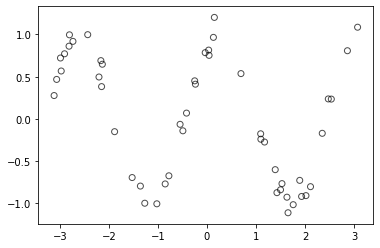

In [7]:
plt.scatter(rxs,rys, alpha=0.7, color='none', edgecolor="black");

To find the mapping corresponding to this data we will use the MSE loss. Untill now all was rather abstract, we were talking about optimizing over a space of all possible functions. That's obviously not possible. The way to proceed is to take a familly of functions parametrized with some set of parameters and optimize over the space of those parameters. 

## Model capacity, underfitting and overfitting

A popular familly of functions are the polynomials of a given degree, the parameters being the polynomial coefficients.  

We will be not fitting the polynomials ourself. Instead we will use a  function `polyfit` from numpy that performs the optimization with respect to MSE loss. Then we will use function `polyval` to calculate the predictons and error:

In [8]:
train_errors = []
polys  = []
for deg in range(28):
    p = np.polyfit(rxs, rys,deg)
    polys.append(p)
    pred_rys = np.polyval(p, rxs) 
    resid = pred_rys-rys
    err_train= 0.5*np.dot(resid, resid)/len(rxs)
    train_errors.append(np.array([deg, err_train]))
fit_res_train = np.stack(train_errors,axis=0)    

And here is how the MSE looks as a function of the polynomial degree:

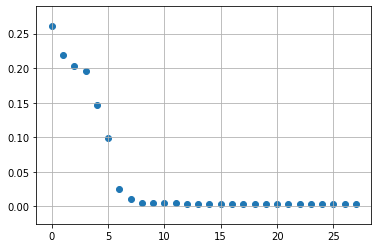

In [9]:
plt.grid()
plt.scatter(fit_res_train[:,0], fit_res_train[:,1]);

and here is a "close-up" of the previous plot.

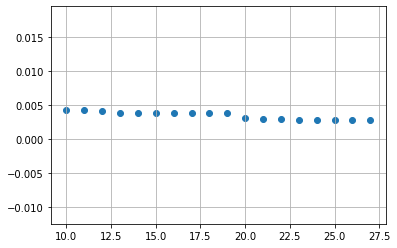

In [10]:
plt.scatter(fit_res_train[10:,0], fit_res_train[10:,1])  
plt.grid()

As you can see the error is high for low degrees and then falls sharply around degree five (could you predict that looking at the data?) and continues to decrease, albeit slowly,  as the degree increases. 

This is a typical behaviour. The polynomial degree is a measure of the model *capacity*. Clearly a polynomial of degree zero (a constant) or one (straight line) is not capable of representing the data. We say that the model *underfits*. As the degree increases the model can represent a larger class of functions and the error gets smaller. Does it mean that we should look for polynomials of yet higher degrees?    

To answer this questions let's take another 25 exaples from the data

In [11]:
rxs_valid = data[50:75,0]
rys_valid = data[50:75,1]

And check how the model performs on them

In [12]:
validation_errors =[]
for deg in range(28):
    p = polys[deg]
    pred_ys = np.polyval(p, rxs_valid) 
    resid = pred_ys-rys_valid
    err_valid= 0.5*np.dot(resid, resid)/len(rxs_valid)
    validation_errors.append(np.array([deg, err_valid]))
fit_res_valid = np.stack(validation_errors, axis=0)    

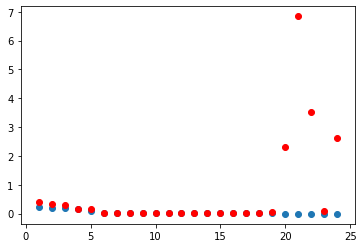

In [13]:
filter = ((fit_res_valid[:,0]>0) & (fit_res_valid[:,0]<25) )
plt.scatter(fit_res_train[filter,0], fit_res_train[filter,1])
plt.scatter(fit_res_valid[filter,0], fit_res_valid[filter,1], c='red');

We see that this *validation error* behaves at the begining similarly to training error. It's decreases with increasing degree. But at certain moment it start to increase in this case quite dramaticaly.

This unfortunately is also typical. Let's look what happens:

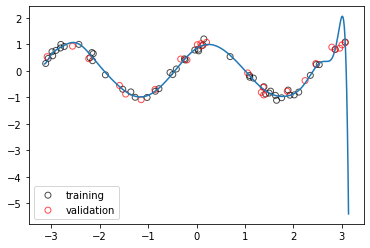

In [14]:
xs = np.linspace(-np.pi, np.pi,500)
ys = np.polyval(polys[19],xs)
plt.scatter(rxs,rys, alpha=0.7, color='none', edgecolor="black", label="training");
plt.scatter(rxs_valid,rys_valid, alpha=0.7, color='none', edgecolor="red", label="validation");
plt.legend()
plt.plot(xs,ys);

As the capacity of model increases it approximates the training data better and better. But it has **no incentive** to keep error low in the regions outside data points. We say that model *overfits* and does not generalise. 

### That's why the minimisation of loss on the training set is NOT the goal of  training! This is a mean to an end, which is generalisation, that is low error on data that model was not trained with. 

Actually if we wanted the network to be 100%accurate on the data we are traning it on we could just memorise them :) 

## Loss vs error

We reserve the name loss to functions that we will optimize (minimize) during the learning. By error we mean any  measure of deviance of the model prediction from the "groud-truth". So MSE is both loss function and an error, while NLL is not usually denoted as an error. On contrary percentage of misclasified examples is an error but not a loss function that could be used in gradient descent (see next notebook). 

Loss and error are of course strongly correlated: lower loss usually implies lower error, but at certain point, especially in classification, this may be not the case: reducing loss does not have to decrease the error. 

That said from the previous regression example we can infer that we have several kinds of error. 

## Training error

This is the error achieved on the training set i.e. the set used for training the model. The training loss is used as the function to be optimized. As we have seen that does not guarantie us that the model will perform well on other data. 

## Validation error 

This  is the  error on a set of data never seen by the learning model. It is an approximates of the generalisation error which itself is impossible to measure. This is the error that we would like to keep low. 

## Bayes error

Let's check the error on the function that was used to produce the data:

In [15]:
rys_true =  np.sin(2.188*rxs+1)
residue = rys_true-rys
0.5*np.mean(residue*residue)

0.005224850227816844

As you can see it is not zero. That is because the data is noisy and the mapping is not deterministic. This is an error that we will never get rid of, it is inherent in the problem. Sometimes it's called the Bayes error.

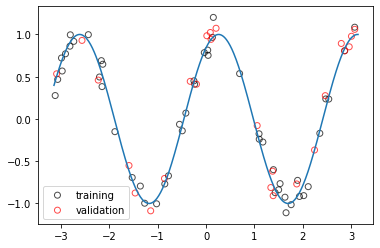

In [16]:
ys_true = np.sin(2.188*xs+1)
plt.scatter(rxs,rys, alpha=0.7, color='none', edgecolor="black", label="training");
plt.scatter(rxs_valid,rys_valid, alpha=0.7, color='none', edgecolor="red", label="validation");
plt.legend()
plt.plot(xs,ys_true);

## Generalisation

As we have stressed the real goal of training is to train a model that generalises well. However be warned that this is not a well posed problem. To illustrate this please look at the data below

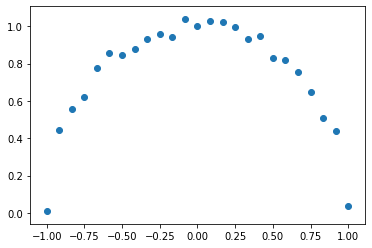

In [17]:
data_resonance = np.load('resonance.npy')
ros = data_resonance[:,0]
rAs = data_resonance[:,1]
#plt.plot(os, As);
plt.scatter(ros,rAs);

The points seem to lie on a rather simple curve and we can try to approximate it be a polynomial of fourth degree

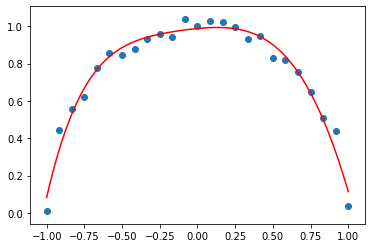

In [18]:
p  = np.polyfit(ros, rAs,5)
xs = np.linspace(-1,1,100)
plt.scatter(ros,rAs);
plt.plot(xs,np.polyval(p, xs),'-r');

However the real function used to generate the data looks like this

In [19]:
from scipy.stats import norm
def func(x,a=1,mu=0, sigma=1):
    return np.sqrt(1-x*x)+a*norm(mu, sigma).pdf(x) 

In [20]:
a=0.02
mu =0.35333
sigma = 0.005

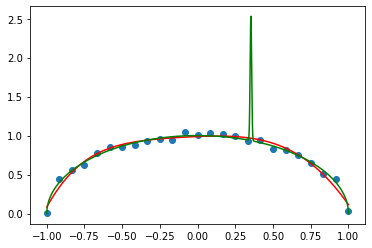

In [21]:
xs = np.linspace(-1,1,1000)
plt.scatter(ros,rAs);
plt.plot(xs,np.polyval(p, xs),'-r')
plt.plot(xs,func(xs,a,mu, sigma),'-g')

I admit this is a contrived example but illustrates an important point. The real loss that we would like to optimize is this

$$\argmin_{\tilde{P}}\int\text{d}\b{x} P(\b{x})\text{d}\b{y} P(\b{y}|\b{x})\loss\left(\b{y},\b{x},\tilde{P}\right)$$

In the above $P$ stands for the real distribution and $\tilde{P}$ for the model. Calculating  this error requires the knowledge of the real $P$. If we new it we would not be training :( The training and validation losses are an approximation to this formula. But those approximation are good as long as we sample the whole space of $x$. Please note that in general $\b{X}$ is of very high dimensions.  Sampling the whole space is impossible and we can only sample some "regions of interest". In principle the data collected by definition samples the most probable regions, but we may have some hidden "peaks": low probability events with big influence on the model.

As an example please imagine that you are collecting data while you drive. For examaples from a camera. How many times did a pedestrian jump in front of you? This is an example of "peak" in the data: a low probability event with very big consequences. And we know that pedestrains sometimes walk in front of a car. Sometimes we have no idea that some region of data distribution has been left over. 

You can find many, not so dramatic, real examples of unsufficient sampling. Just search for "data biases". 

This is not intended to sound pesimistic. We just want you to remember that with supervised learning **your model will be only as good as your data**. 

## What comes next

This notebook was intended to give you a notion of what supervising learning is and of it's limitations. The next notebook will go into technical details how to find the model that minimzes loss function.

## Takeaways

Supervised learning consists of finding a model that best describes a mapping between sets of features and labels. 

This is achieved by minimizing a suitably choosen loss function

The goal is to have low validation error, not only the training error. 

The model is only as good as the collected data is representative.